In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

 age : 0.0%
 sex : 0.0%
 bmi : 0.0%
 children : 0.0%
 smoker : 0.0%
 region : 0.0%
 charges : 0.0%
Повторяющиеся строки : 
      age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631
Повторяющиеся строки : 
 Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max      64.000000    53.130000     5.000000  63770.428010


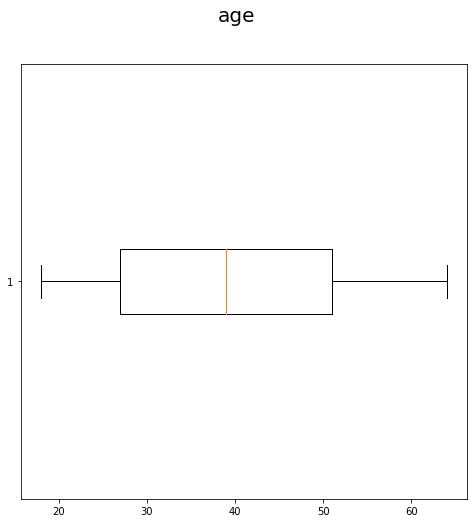

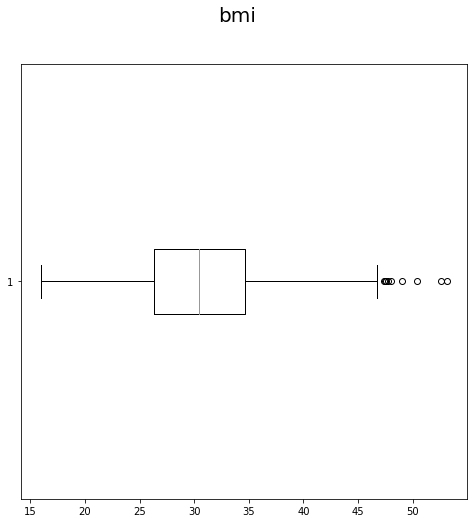

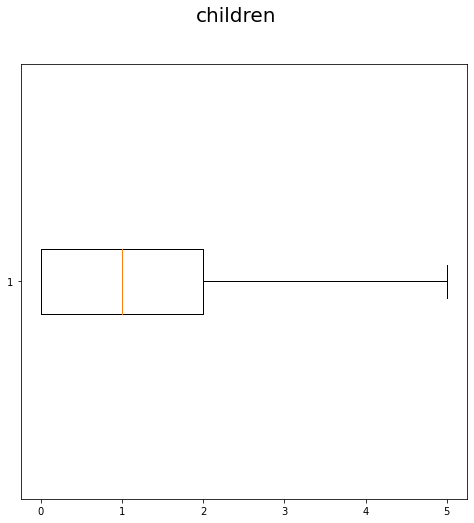

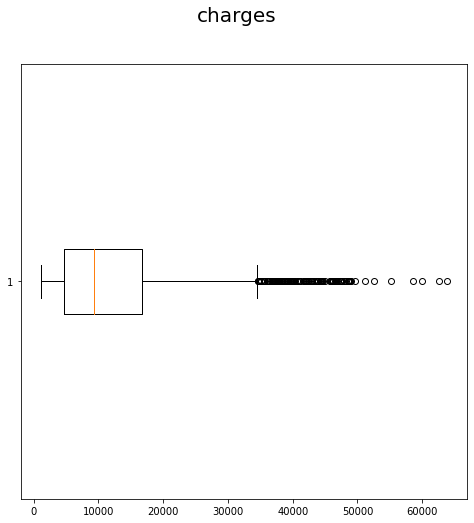

['female' 'male']
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [51]:
data = pd.read_csv('insurance.csv')

for column in data.columns:
  missing = np.mean(data[column].isna()*100)
  print(f" {column} : {round(missing,1)}%")

Dup_Rows = data[data.duplicated()]
print("Повторяющиеся строки : \n {}".format(Dup_Rows))

data.drop_duplicates(keep = 'first', inplace = True)

Dup_Rows = data[data.duplicated()]
print("Повторяющиеся строки : \n {}".format(Dup_Rows))

print(data.describe())

for column in data.columns:
  if not(isinstance(data[column][0], str)):
    plt.figure(figsize = (8, 8))
    plt.suptitle(column, fontsize=20)
    plt.boxplot(data[column], vert = False)

plt.show()

print(data['sex'].unique())
print(data['age'].unique())
print(data['smoker'].unique())
print(data['region'].unique())
data

In [52]:
dataNew = data
dataNew.drop(['age','sex','children','smoker','charges'], axis = 1, inplace=True)
dataNew

,bmi,region
0,27.900,southwest
1,33.770,southeast
2,33.000,southeast
3,22.705,northwest
4,28.880,northwest
...,...,...
1333,30.970,northwest
1334,31.920,northeast
1335,36.850,southeast
1336,25.800,southwest


In [53]:
groups = dataNew.groupby("region").groups

southwest = dataNew['bmi'][groups['southwest']]
southeast = dataNew['bmi'][groups['southeast']]
northwest = dataNew['bmi'][groups['northwest']]
northeast = dataNew['bmi'][groups['northeast']]
sts.f_oneway(southwest, southeast, northwest, northeast)

F_onewayResult(statistic=39.48593864487439, pvalue=1.9087293927440606e-24)

In [54]:
model = ols('bmi ~ region', data=dataNew).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

                sum_sq      df          F        PR(>F)
region     4057.813904     3.0  39.485939  1.908729e-24
Residual  45662.381091  1333.0        NaN           NaN


In [55]:
region_pairs = []
regions = ['southwest', 'southeast', 'northwest', 'northeast']

for region1 in range(3):
  for region2 in range(region1 + 1, 4):
    region_pairs.append((regions[region1], regions[region2]))

m=len(region_pairs)

for region1, region2 in region_pairs:
  print(region1, region2, sts.ttest_ind(dataNew['bmi'][groups[region1]], dataNew['bmi'][groups[region2]])[1]*m)

southwest southeast 3.2624405783808385e-08
southwest northwest 0.006346503558640768
southwest northeast 0.011451697002943843
southeast northwest 1.6502553328676534e-18
southeast northeast 7.116089624548878e-17
northwest northeast 5.75898042111181


group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,0.022,0.9,-1.1609,1.2048,False
northeast,southeast,4.1825,0.001,3.0326,5.3324,True
northeast,southwest,1.4231,0.0107,0.2412,2.605,True
northwest,southeast,4.1605,0.001,3.0106,5.3104,True
northwest,southwest,1.4011,0.0125,0.2192,2.5831,True
southeast,southwest,-2.7594,0.001,-3.9083,-1.6104,True


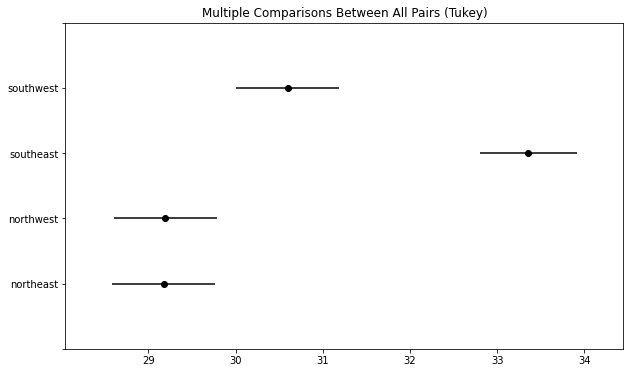

In [56]:
turkey = pairwise_tukeyhsd(endog = dataNew['bmi'], groups = dataNew['region'], alpha = 0.05)
turkey.plot_simultaneous()
turkey.summary()

In [57]:
data = pd.read_csv('insurance.csv')
dataNew2 = data
dataNew2.drop(['age','children','smoker','charges'], axis = 1, inplace=True)
dataNew2

,sex,bmi,region
0,female,27.900,southwest
1,male,33.770,southeast
2,male,33.000,southeast
3,male,22.705,northwest
4,male,28.880,northwest
...,...,...,...
1333,male,30.970,northwest
1334,female,31.920,northeast
1335,female,36.850,southeast
1336,female,25.800,southwest


In [58]:
model = ols('bmi ~ C(region) + C(sex) + C(region):C(sex)', data = dataNew2).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(region),4034.975135,3.0,39.398134,2.163195e-24
C(sex),86.007035,1.0,2.519359,1.126940e-01
C(region):C(sex),174.157808,3.0,1.700504,1.650655e-01
Residual,45404.154911,1330.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
northeast / female,northeast / male,-0.2998,0.9,-2.2706,1.671,False
northeast / female,northwest / female,-0.0464,0.9,-2.0142,1.9215,False
northeast / female,northwest / male,-0.2042,0.9,-2.1811,1.7727,False
northeast / female,southeast / female,3.3469,0.001,1.41,5.2839,True
northeast / female,southeast / male,4.6657,0.001,2.7634,6.568,True
northeast / female,southwest / female,0.7362,0.9,-1.2377,2.71,False
northeast / female,southwest / male,1.8051,0.1007,-0.1657,3.776,False
northeast / male,northwest / female,0.2534,0.9,-1.7083,2.2152,False
northeast / male,northwest / male,0.0956,0.9,-1.8752,2.0664,False
northeast / male,southeast / female,3.6467,0.001,1.716,5.5775,True


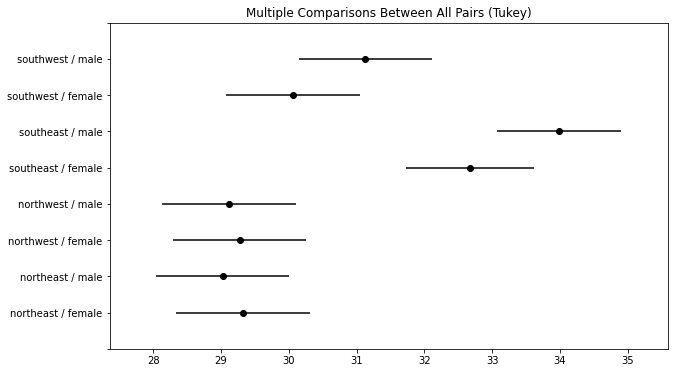

In [59]:
dataNew2['combination'] = dataNew2.region + ' / ' + dataNew2.sex

turkey = pairwise_tukeyhsd(endog = dataNew2['bmi'], groups = dataNew2['combination'], alpha = 0.05)
turkey.plot_simultaneous()
turkey.summary()